In [1]:
import torch as th
import matplotlib.pyplot as plt
%matplotlib inline

import ipywidgets as widgets
from ipywidgets import interact

In [30]:
SAVE_PATH = './saved_models/'

exp_names = ['exp', 'exp0', 'exp_srv27']

exp_name = widgets.ToggleButtons(options=exp_names,
                                description='exp name:', disabled=False)

domain = widgets.ToggleButtons(options=['H36M', 'MPII'],
                                description='domain:', disabled=False)

mode = widgets.ToggleButtons(options=['train', 'val'], 
                                description='mode:', disabled=False)

loss_map = {'Pose Regression':'pr', 'Domain Confusion':'dd'}
loss_type = widgets.ToggleButtons(options=['Domain Confusion', 'Pose Regression'],
                                description='loss type:', disabled=False)

max_x = 100000
slices = widgets.SelectionRangeSlider(options=list((range(0, max_x+100)))[0::100], 
                                      index=[0,max_x//100],
                                description='x range: ',disabled=False)

@interact
def plot_loss(exp_name=exp_name, domain=domain, 
              loss_type=loss_type, mode=mode, slices=slices):
    domain = 0 if domain == 'H36M' else 1
    loss_type = loss_map[loss_type]
    save_path = SAVE_PATH+exp_name+'/'
    losses = th.load(save_path+'losses.pth')
    arr = losses[domain][loss_type][mode][slices[0]:slices[1]]
    plt.semilogy(arr)


interactive(children=(ToggleButtons(description='exp name:', options=('exp', 'exp0', 'exp_srv27'), value='exp'…

In [31]:
losses = th.load(SAVE_PATH+'exp/losses.pth')

In [32]:
tmp_losses = losses.copy()

In [29]:
len(losses[0]['dd']['train'])

200

In [8]:
from models import DamNet, PoseRegressor

dn = DamNet(2)
pr = PoseRegressor()

In [10]:
device = th.device('cpu')
exp_name = 'exp0'
state = th.load(SAVE_PATH+exp_name+'/state.pth',
        map_location='cpu')

In [11]:
dn.load_state_dict(state['fe_state_dict'])
pr.load_state_dict(state['pr_state_dict'])

<All keys matched successfully>

In [12]:
from dataset_loader import H36M, MPII

In [13]:
mpii = MPII(num_images=100, mode='val')
h36m = H36M(num_images=100, mode='val')

In [14]:
mpii_sample = mpii[0]
h36m_sample = h36m[0]


In [15]:
mpii_img = mpii_sample[0].unsqueeze(0).float()
mpii_out = pr(dn(mpii_img, 1)).detach().numpy()

In [16]:
h36m_img = h36m_sample[0].unsqueeze(0).float()
h36m_out = pr(dn(h36m_img, 0)).detach().numpy()

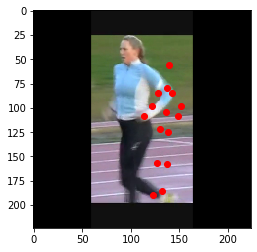

In [17]:
plt.imshow(mpii_img[0].permute(1,2,0))
plt.plot(mpii_out[0][:,0], mpii_out[0][:,1], 'ro')

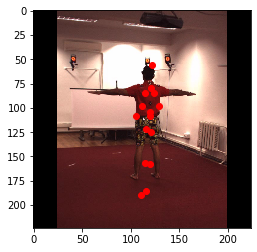

In [18]:
plt.imshow(h36m_img[0].permute(1,2,0))
plt.plot(h36m_out[0][:,0], mpii_out[0][:,1], 'ro')